# SPAM DETECTION

In [119]:
import numpy as np
import pandas as pd

In [121]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [123]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [125]:
df.shape

(5572, 5)

## Steps in the project
1. Data cleaning
2. EDA
3. Text Preprocessing
4. Model building
5. Evaluation
6. Improvement
7. Website

## 1. Data Cleaning

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [131]:
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [133]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [155]:
# renaming columns
df.rename(columns = {'v1':'target', 'v2':'text'} , inplace = True)

In [157]:
df.sample(2)

,target,text
474,0,Nice line said by a broken heart- Plz don't cu...
2276,0,Love you aathi..love u lot..


In [159]:
from sklearn.preprocessing import LabelEncoder

In [161]:
encoder = LabelEncoder()

In [163]:
#encoding target values 
df['target'] = encoder.fit_transform(df['target'])

In [165]:
df.sample(10)

,target,text
3128,0,"Haha better late than ever, any way I could sw..."
2971,0,Sary just need Tim in the bollox &it hurt him ...
586,0,"I dun thk i'll quit yet... Hmmm, can go jazz ?..."
805,0,I dled 3d its very imp
1036,0,"No my blankets are sufficient, thx"
4136,0,Just got to &lt;#&gt;
2398,0,YO YO YO BYATCH WHASSUP?
1214,0,I'll text now! All creepy like so he won't thi...
1962,1,it to 80488. Your 500 free text messages are v...
1712,0,o turns out i had stereo love on mi phone unde...


In [169]:
# checking for null value
df.isnull().sum()

target    0
text      0
dtype: int64

In [173]:
# checking for duplicated values
df.duplicated().sum()

403

In [175]:
# removing duplicated values
df = df.drop_duplicates(keep = 'first')

In [177]:
df.duplicated().sum()

0

In [179]:
df.shape

(5169, 2)

## 2. EDA

In [187]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [189]:
import matplotlib.pyplot as plt

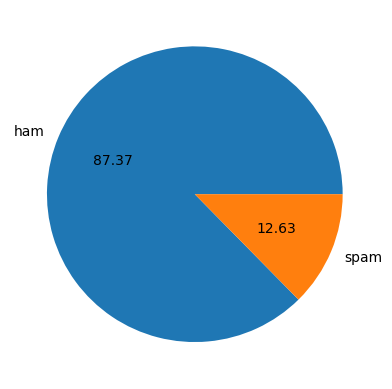

In [197]:
plt.pie(df['target'].value_counts(), labels = ['ham','spam'], autopct = '%0.2f')
plt.show()

In [199]:
# Date is imbalanced

In [201]:
!pip install nltk

In [203]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [205]:
# fetch number of characters

In [207]:
df['num_characters'] = df['text'].apply(len)

In [209]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [211]:
# fetch number of words

In [219]:
df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [221]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [223]:
df['num_sentence'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [225]:
df.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [227]:
df[['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [231]:
df[df['target'] == 0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [233]:
df[df['target'] == 1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [235]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

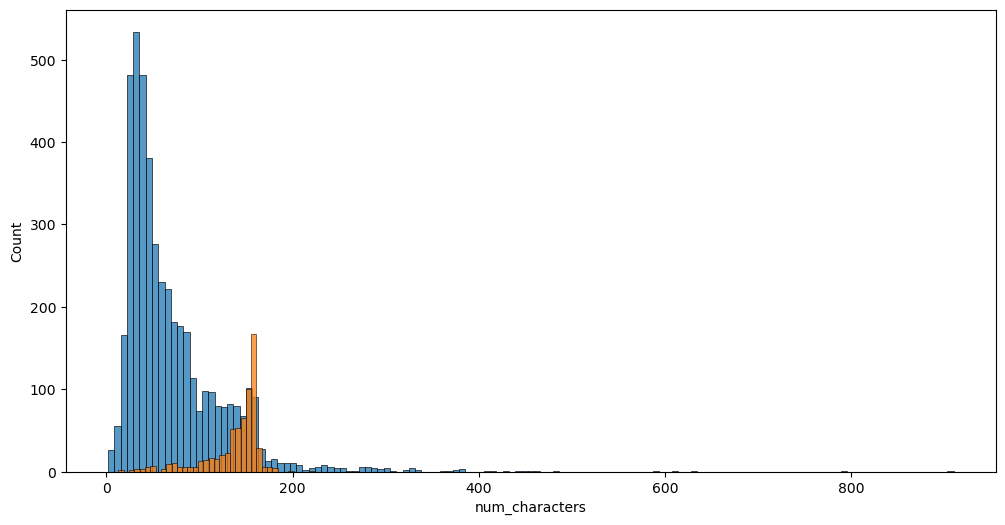

In [251]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'])

<Axes: xlabel='num_words', ylabel='Count'>

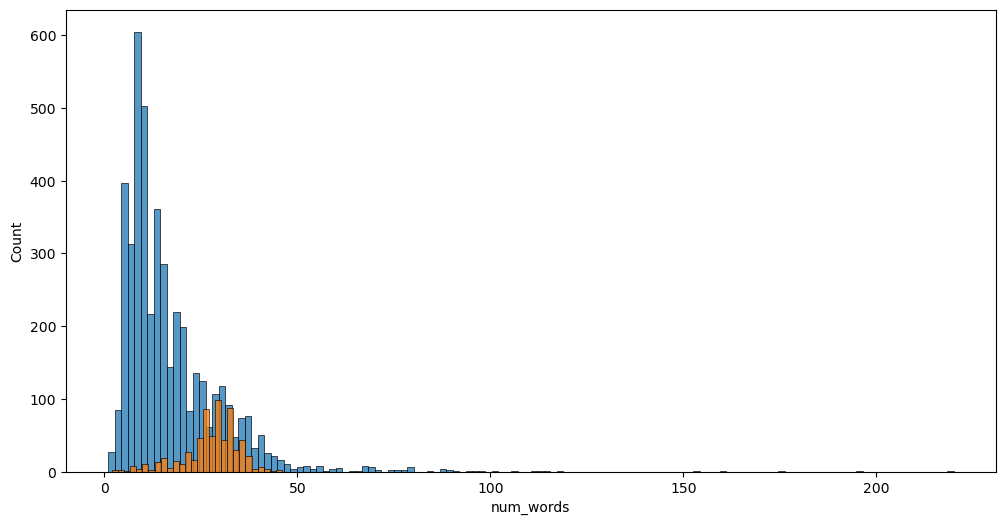

In [252]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'])

<Axes: xlabel='num_sentence', ylabel='Count'>

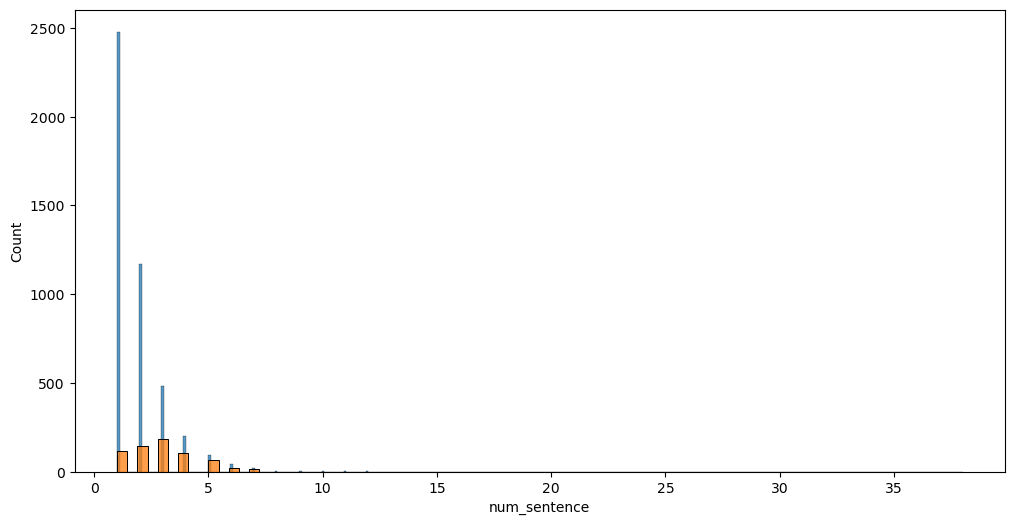

In [256]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['target'] == 0]['num_sentence'])
sns.histplot(df[df['target'] == 1]['num_sentence'])

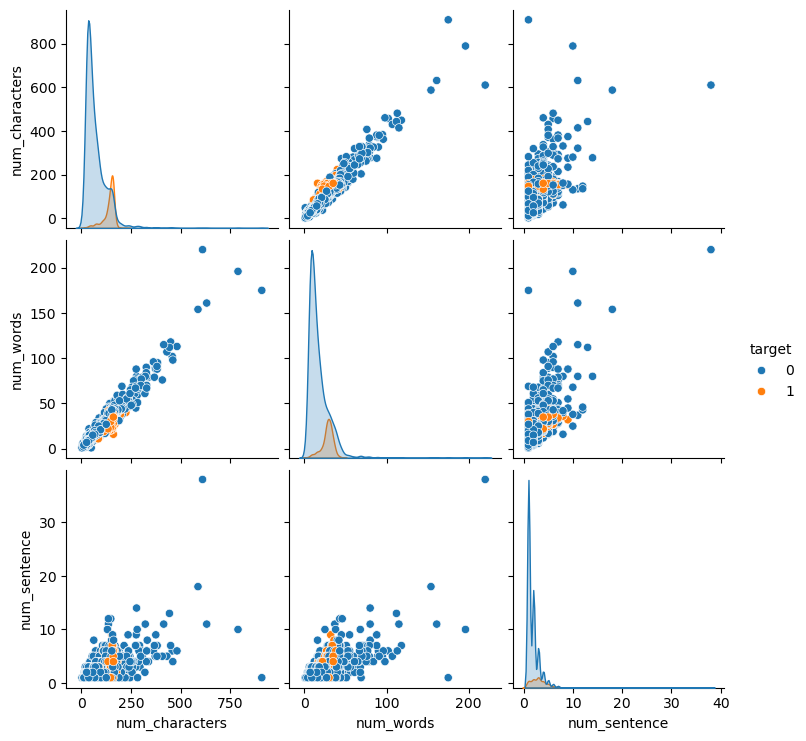

In [258]:
sns.pairplot(df, hue = 'target')

<Axes: >

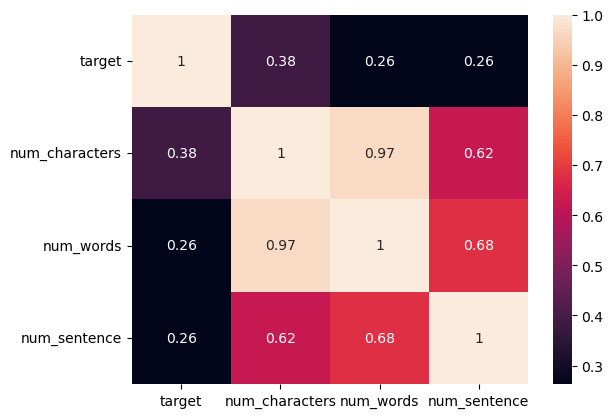

In [265]:
sns.heatmap(df.select_dtypes('number').corr(), annot = True)

## Date Preprocessing
* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* Stemming

In [316]:
 nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [318]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [342]:
from nltk.stem.porter import PorterStemmer
pm = PorterStemmer()
pm.stem('dancing')

'danc'

In [344]:
def transform_text (text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(pm.stem(i))
    
    return " ".join(y)

In [349]:
transform_text('How Are you charlie?? &&')

['charli']

In [357]:
df['transformed_text'] = df['text'].apply(transform_text)

In [358]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goe, usf, live, around, though]"


In [367]:
!pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size = 10, background_color = 'white')

In [377]:
spam_text = df[df['target'] == 1]['transformed_text'].fillna("").astype(str).str.cat(sep=" ")

# Generate the word cloud
spam_wc = wc.generate(spam_text)

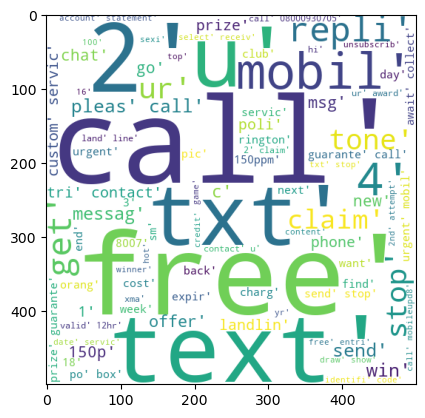

In [381]:
plt.imshow(spam_wc)

In [383]:
spam_text = df[df['target'] == 0]['transformed_text'].fillna("").astype(str).str.cat(sep=" ")

# Generate the word cloud
ham_wc = wc.generate(spam_text)

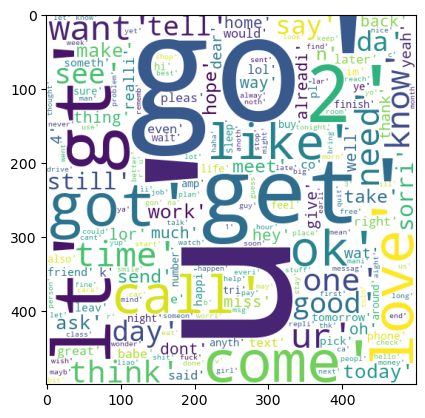

In [385]:
plt.imshow(spam_wc)

In [387]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goe, usf, live, around, though]"


In [391]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg:
        spam_corpus.append(word)

In [393]:
len(spam_corpus)

9939

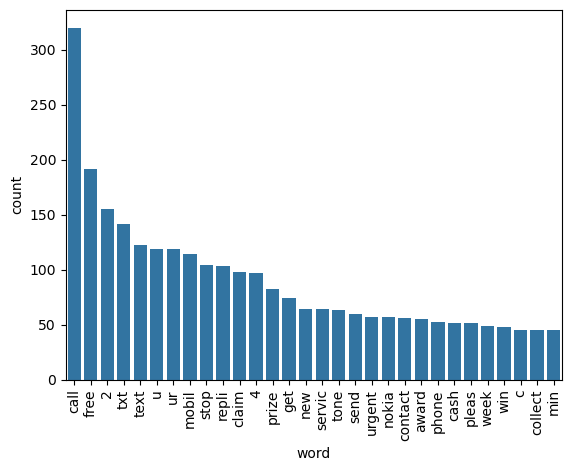

In [403]:
from collections import Counter
spam_counts = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])
# Plot using seaborn's barplot, specifying x and y as keyword arguments
sns.barplot(x='word', y='count', data=spam_counts)
plt.xticks(rotation='vertical')
plt.show()

In [407]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg:
        ham_corpus.append(word)

In [409]:
len(ham_corpus)

35404

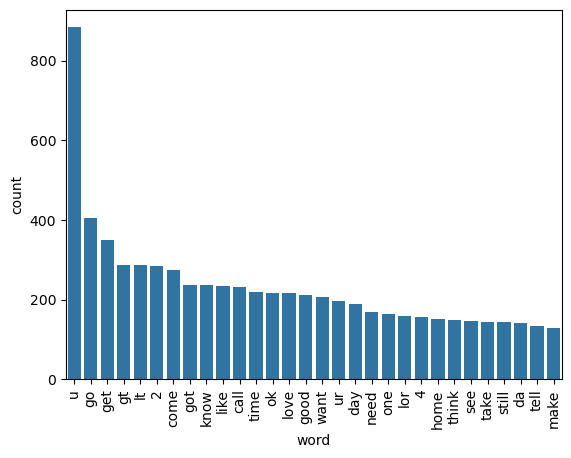

In [411]:
from collections import Counter
spam_counts = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])
# Plot using seaborn's barplot, specifying x and y as keyword arguments
sns.barplot(x='word', y='count', data=spam_counts)
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

In [445]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [447]:
#df['transformed_text'] = df['transformed_text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
#X = cv.fit_transform(df['transformed_text']).toarray()
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [449]:
X.shape

(5169, 3000)

In [451]:
y = df['target'].values

In [453]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train,y_test = train_test_split(X,y, test_size=0.2, random_state = 2)

In [455]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [457]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [459]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [461]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [463]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [467]:
!pip install xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 787.7 kB/s eta 0:02:39
   ---------------------------------------- 0.2/124.9 MB 1.6 MB/s eta 0:01:21
   ---------------------------------------- 0.4/124.9 MB 2.3 MB/s eta 0:00:56
   ---------------------------------------- 0.6/124.9 MB 2.9 MB/s eta 0:00:43
   ---------------------------------------- 0.9/124.9 MB 3.4 MB/s eta 0:00:37
   ---------------------------------------- 1.1/124.9 MB 3.7 MB/s eta 0:00:34
   ---------------------------------------- 1.3/124.9 MB 3.6 MB/s eta 0:00:35
   ---------------------------------------- 1.5/124.9 MB 3.8 MB/s eta 0:00:33
    --------------------------------------- 1.7/124.9 MB 3.7 MB/s eta 0:00:34
    --------------------------------------- 1.9/124.9 MB 3.8 MB/s eta 0:00:33
    --------------------------------------- 1.9/124.9 MB 3.6 MB/s eta 0:00:3

In [468]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [469]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [473]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [475]:
train_classifier(svc,X_train,y_train,X_test,y_test)


(0.9758220502901354, 0.9747899159663865)

In [477]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9303675048355899
Precision -  0.8173076923076923
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [478]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [479]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [485]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [487]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,xgb,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


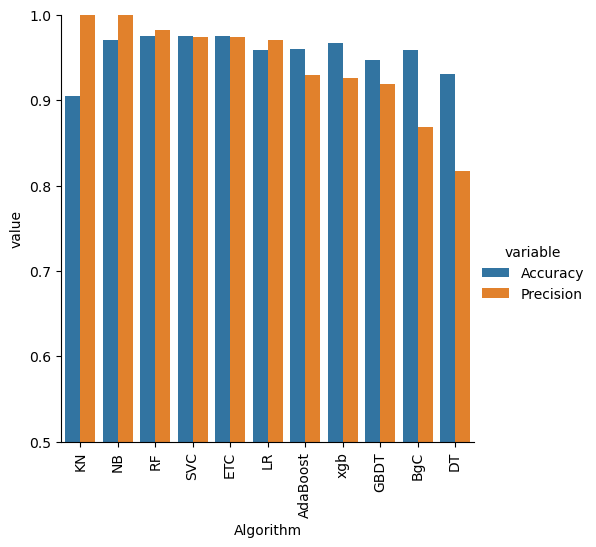

In [489]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [491]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))